In [1]:

import tools21cm as t2c
import matplotlib.colors as colors
from scipy import interpolate, stats

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import math

In [3]:
start_freq = 1.06e8
end_freq = 1.96e8
num_of_freqs = 901
delta_freq = (end_freq - start_freq)/num_of_freqs

In [4]:


def jyperb_to_k(cube):
    #Jy/beam to K conversion
    c = 2.998e8
    pi = 3.14159
    k_b = 1.38e-23
    freq = start_freq + 5*delta_freq
    lamb = c/(freq*1.0e6)
    D = 7000
    FWHM = 1.22 * lamb / D 

    beamarea = np.pi * FWHM**2 / (4.0*math.log(2)) # beam solid angle of Gaussian beam
    cube = cube *1e-26*(c/(freq*1.0e6))**2*(1.0/(2.0*k_b*beamarea)) # in K
    return cube

load in msw cube

base = '/home/ppxjf3/SKA_Data/'

image_hdl = fits.open(base + 'ZW3.msw_image.fits')
image = image_hdl[0].data
image_hdl.close()

get just primary beam

total_data =  np.transpose(image, (1,2,0))
idx0 = 2048//2 - 512//2

idx1 = 2048//2 + 512//2
pixel_size = idx1 -idx0


total_data = total_data[idx0:idx1, idx0:idx1, :] 

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1,2,1)
im = ax.imshow(total_data[:,:,0])
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
fig.colorbar(im, ax=ax)
clim = im.properties()['clim']

make power spectra

#calculate cylindrical power spectra
#number of bins for power spectra
bins = 6
pp_tdmsw, kper_tdmsw, kpar_tdmsw, n_tdmsw = t2c.power_spect_2d( jyperb_to_k(total_data[:,:,0:20]), kbins=bins, box_dims= 52.4592, return_modes=True)
fp_tdmsw = interpolate.interp2d(kper_tdmsw, kpar_tdmsw, pp_tdmsw.T, kind='linear')

fig, ax = plt.subplots(1,1,figsize=(7,5))
plotting_scale={'x': 'log', 'y': 'log', 'z': 'log'}
X_tdmsw, Y_tdmsw = kper_tdmsw, kpar_tdmsw
C_tdmsw = fp_tdmsw(X_tdmsw,Y_tdmsw)

norm_tdmsw = colors.LogNorm(vmin=C_tdmsw[np.isfinite(C_tdmsw)].min(), vmax=C_tdmsw[np.isfinite(C_tdmsw)].max()) if plotting_scale['z']=='log' else None 
pcm_tdmsw = ax.pcolormesh(X_tdmsw, Y_tdmsw, C_tdmsw, norm=norm_tdmsw)

plt.colorbar(pcm_tdmsw, ax=ax, label='power', pad=0.01)
ax.set_xlabel(r'k$\perp$')
ax.set_ylabel(r'k$\parallel$')
ax.set_xscale(plotting_scale['x'])
ax.set_yscale(plotting_scale['y'])
plt.show()

FastICA on the Primary Beam of the SKA data cube with different numbers of components

First with 4 components

base = '/home/ppxjf3/'

fits_path = base + 'model_fICA_msw_6.fits'

with fits.open(fits_path, memmap=True) as hdu:

    arr = np.array(hdu[0].data[0:10, :, :])

    hdu.info()

    print(arr.shape)

    model_6 = arr

fits_path = base + 'resids_fICA_msw_6.fits'

with fits.open(fits_path, memmap=True) as hdu:

    arr = np.array(hdu[0].data[0:10, :, :])

    hdu.info()

    print(arr.shape)

    resids_6 = arr

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1,2,1)
im = ax.imshow(model_6[0,:,:])
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
ax.set_title('c=6 Model')
fig.colorbar(im, ax=ax)
clim = im.properties()['clim']
ax = fig.add_subplot(1,2,2)
im = ax.imshow(np.log10(resids_6[0,:,:]))
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
ax.set_title('c=6 Residuals')
fig.colorbar(im, ax=ax)
plt.show()

residuals in negative so over fitting 

#calculate cylindrical power spectra
#number of bins for power spectra
bins = 7
pp_msw6, kper_msw6, kpar_msw6, n_msw6 = t2c.power_spect_2d(jyperb_to_k(resids_6[0:20,:,:]), kbins=bins, box_dims=  52.4592, return_modes=True)
fp_msw6 = interpolate.interp2d(kper_msw6, kpar_msw6, pp_msw6.T, kind='linear')

fig, ax = plt.subplots(1,1,figsize=(7,5))
plotting_scale={'x': 'log', 'y': 'log', 'z': 'log'}
X_msw6, Y_msw6 = kper_msw6, kpar_msw6
C_msw6 = fp_msw6(X_msw6,Y_msw6)

norm_msw6 = colors.LogNorm(vmin=C_msw6[np.isfinite(C_msw6)].min(), vmax=C_msw6[np.isfinite(C_msw6)].max()) if plotting_scale['z']=='log' else None 
pcm_msw6 = ax.pcolormesh(X_msw6, Y_msw6, C_msw6, norm=norm_msw6)

plt.colorbar(pcm_msw6, ax=ax, label='power', pad=0.01)
ax.set_xlabel(r'k$\perp$')
ax.set_ylabel(r'k$\parallel$')
ax.set_xscale(plotting_scale['x'])
ax.set_yscale(plotting_scale['y'])
plt.show()

#calculate cylindrical power spectra
#number of bins for power spectra
bins = 7
pp1, kper1, kpar1, n1 = t2c.power_spect_2d(model_6[0:10,:,:], kbins=bins, box_dims=  52.4592, return_modes=True)
fp1 = interpolate.interp2d(kper1, kpar1, pp1.T, kind='linear')

fig, ax = plt.subplots(1,1,figsize=(7,5))
plotting_scale={'x': 'log', 'y': 'log', 'z': 'log'}
X1, Y1 = kper1, kpar1
C1 = fp1(X1,Y1)

norm1 = colors.LogNorm(vmin=C1[np.isfinite(C1)].min(), vmax=C1[np.isfinite(C1)].max()) if plotting_scale['z']=='log' else None 
pcm1 = ax.pcolormesh(X1, Y1, C1, norm=norm1)

plt.colorbar(pcm1, ax=ax, label='power', pad=0.01)
ax.set_xlabel(r'k$\perp$')
ax.set_ylabel(r'k$\parallel$')
ax.set_xscale(plotting_scale['x'])
ax.set_yscale(plotting_scale['y'])
plt.show()

base = '/home/ppxjf3/'

fits_path = base + 'model_fICA_msw_4.fits'

with fits.open(fits_path, memmap=True) as hdu:

    arr = np.array(hdu[0].data[0:10, :, :])

    hdu.info()

    print(arr.shape)

    model_msw_4 = arr

fits_path = base + 'resids_fICA_msw_4.fits'

with fits.open(fits_path, memmap=True) as hdu:

    arr = np.array(hdu[0].data[0:10, :, :])

    hdu.info()

    print(arr.shape)

    resids_msw_4 = arr

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1,2,1)
im = ax.imshow(model_msw_4[0,:,:])
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
ax.set_title('c=4 Model')
fig.colorbar(im, ax=ax)
clim = im.properties()['clim']
ax = fig.add_subplot(1,2,2)
im = ax.imshow(np.log10(resids_msw_4[0,:,:]))
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
ax.set_title('c=4 Residuals')
fig.colorbar(im, ax=ax)
plt.show()

Now for msn

In [5]:
base = '/home/ppxjf3/SKA_Data/'

image_hdl = fits.open(base + 'ZW3.msn_image.fits')
image = image_hdl[0].data
image_hdl.close()

print(image.shape)
pixel_size = 2048
num_of_freqs = 901

total_data =  np.transpose(image, (1,2,0))
idx0 = 2048//2 - 512//2

idx1 = 2048//2 + 512//2
pixel_size = idx1 -idx0


msn = total_data[idx0:idx1, idx0:idx1, :] 

(901, 2048, 2048)


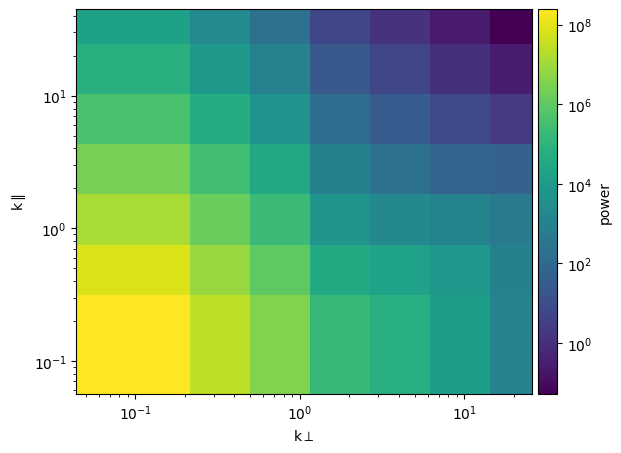

In [6]:
#calculate cylindrical power spectra
#number of bins for power spectra
bins = 7
pp_tdmsn, kper_tdmsn, kpar_tdmsn, n_tdmsn = t2c.power_spect_2d(jyperb_to_k(msn[0:20,:,:]), kbins=bins, box_dims=  52.4592, return_modes=True)
fp_tdmsn = interpolate.interp2d(kper_tdmsn, kpar_tdmsn, pp_tdmsn.T, kind='linear')

fig, ax = plt.subplots(1,1,figsize=(7,5))
plotting_scale={'x': 'log', 'y': 'log', 'z': 'log'}
X_tdmsn, Y_tdmsn = kper_tdmsn, kpar_tdmsn
C_tdmsn = fp_tdmsn(X_tdmsn,Y_tdmsn)

norm_tdmsn = colors.LogNorm(vmin=C_tdmsn[np.isfinite(C_tdmsn)].min(), vmax=C_tdmsn[np.isfinite(C_tdmsn)].max()) if plotting_scale['z']=='log' else None 
pcm_tdmsn = ax.pcolormesh(X_tdmsn, Y_tdmsn, C_tdmsn, norm=norm_tdmsn)

plt.colorbar(pcm_tdmsn, ax=ax, label='power', pad=0.01)
ax.set_xlabel(r'k$\perp$')
ax.set_ylabel(r'k$\parallel$')
ax.set_xscale(plotting_scale['x'])
ax.set_yscale(plotting_scale['y'])
plt.show()

In [7]:
base = '/home/ppxjf3/'

fits_path = base + 'model_fICA_msn_6.fits'

with fits.open(fits_path, memmap=True) as hdu:

    arr = np.array(hdu[0].data[0:10, :, :])

    hdu.info()

    print(arr.shape)

    model_6_msn = arr

fits_path = base + 'resids_fICA_msn_6.fits'

with fits.open(fits_path, memmap=True) as hdu:

    arr = np.array(hdu[0].data[0:10, :, :])

    hdu.info()

    print(arr.shape)

    resids_6_msn = arr

Filename: /home/ppxjf3/model_fICA_msn_6.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (512, 512, 20)   float64   
(10, 512, 512)
Filename: /home/ppxjf3/resids_fICA_msn_6.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (512, 512, 20)   float64   
(10, 512, 512)


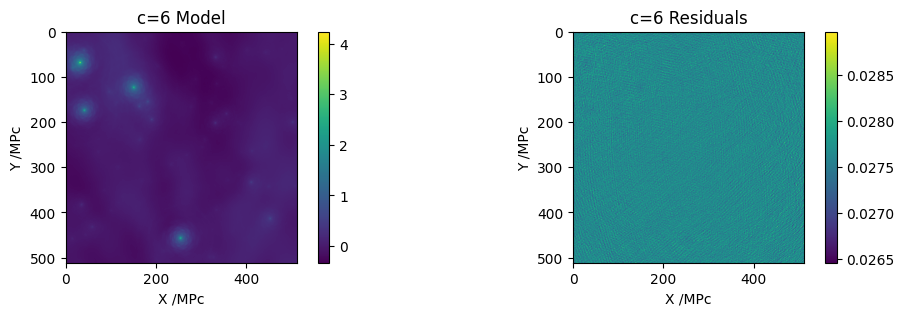

In [8]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1,2,1)
im = ax.imshow(model_6_msn[0,:,:])
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
ax.set_title('c=6 Model')
fig.colorbar(im, ax=ax)
clim = im.properties()['clim']
ax = fig.add_subplot(1,2,2)
im = ax.imshow(resids_6_msn[0,:,:])
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
ax.set_title('c=6 Residuals')
fig.colorbar(im, ax=ax)
plt.show()

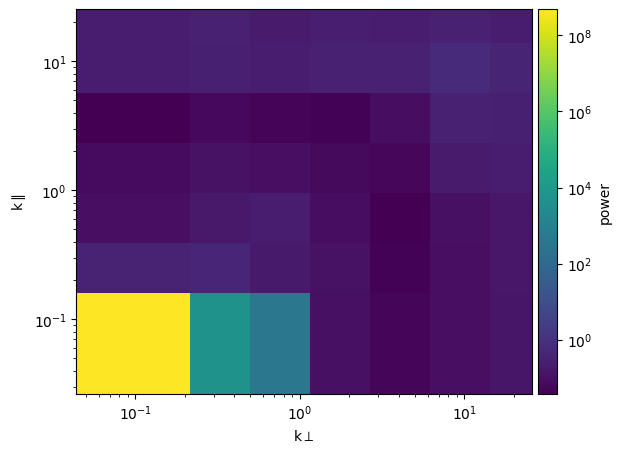

In [9]:
#calculate cylindrical power spectra
#number of bins for power spectra
bins = 7
pp_6msn, kper_6msn, kpar_6msn, n_6msn = t2c.power_spect_2d(jyperb_to_k(resids_6_msn[0:20,:,:]), kbins=bins, box_dims= 52.4592, return_modes=True)
fp_6msn = interpolate.interp2d(kper_6msn, kpar_6msn, pp_6msn.T, kind='linear')

fig, ax = plt.subplots(1,1,figsize=(7,5))
plotting_scale={'x': 'log', 'y': 'log', 'z': 'log'}
X_6msn, Y_6msn = kper_6msn, kpar_6msn
C_6msn = fp_6msn(X_6msn,Y_6msn)

norm_6msn = colors.LogNorm(vmin=C_6msn[np.isfinite(C_6msn)].min(), vmax=C_6msn[np.isfinite(C_6msn)].max()) if plotting_scale['z']=='log' else None 
pcm_6msn = ax.pcolormesh(X_6msn, Y_6msn, C_6msn, norm=norm_6msn)

plt.colorbar(pcm_6msn, ax=ax, label='power', pad=0.01)
ax.set_xlabel(r'k$\perp$')
ax.set_ylabel(r'k$\parallel$')
ax.set_xscale(plotting_scale['x'])
ax.set_yscale(plotting_scale['y'])
plt.show()

GPR with only 1 restart because it failed on the second restart

In [10]:
base = '/home/ppxjf3/SKA_Data/'

fits_path = base + 'SKA_GPR_model_msn.fits'

with fits.open(fits_path, memmap=True) as hdu:

    arr = np.array(hdu[0].data[0:10, :, :])

    hdu.info()

    print(arr.shape)

    model_gpr_msw = arr

fits_path = base + 'SKA_GPR_resids_msn.fits'

with fits.open(fits_path, memmap=True) as hdu:

    arr = np.array(hdu[0].data[0:10, :, :])

    hdu.info()

    print(arr.shape)

    resids_gpr_msw = arr

Filename: /home/ppxjf3/SKA_Data/SKA_GPR_model_msn.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (10, 512, 512)   float64   
(10, 512, 10)
Filename: /home/ppxjf3/SKA_Data/SKA_GPR_resids_msn.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (10, 512, 512)   float64   
(10, 512, 10)


In [11]:
resids_gpr_msw.shape

(10, 512, 10)

make overview figure

In [12]:
#make first paper overview plot

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#Paper specific Matploblib settings
import matplotlib.font_manager
import matplotlib as mpl

def log_lims(value, up_err, low_err):
	err_down = 10**(value - low_err) - 10**(value)
	err_up =  10**(value + up_err) - 10**(value)
	return err_down, err_up

column_width=240# call "\the\columnwidth" in LaTeX to find
ppi=72#default ppi, can be left the same

scale=2
fig_width=column_width/ppi*scale#inches
fig_height=3*scale#inches

##SET FONT SIZES
font_small_size = 9
font_medium_size = 12
font_bigger_size = 9

plt.rc('font', size=font_small_size) # controls default text sizes
plt.rc('axes', titlesize=font_small_size) # fontsize of the axes title
plt.rc('axes', labelsize=font_medium_size) # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_small_size) # fontsize of the tick labels
plt.rc('ytick', labelsize=font_small_size) # fontsize of the tick labels
plt.rc('legend', fontsize=font_small_size) # legend fontsize
plt.rc('figure', titlesize=font_bigger_size)


#correct font for MNRAS
#can be found at https://www.fontsquirrel.com/fonts/nimbus-roman-no9-l
#can be installed on Unix systems by putting unzipped folder in directory /home/{user}/.fonts
#run "fc-cache -v" in console to inform system of new font
#print(matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf'))
#plt.rc('font', family='Nimbus Roman')
# mpl.rcParams["font.family"] = "Nimbus Roman"
# mpl.rcParams['mathtext.fontset'] = 'custom'
# mpl.rcParams['mathtext.rm'] = 'Nimbus Roman'
# mpl.rcParams['mathtext.it'] = 'Nimbus Roman:italic'
# mpl.rcParams['mathtext.bf'] = 'Nimbus Roman:bold'
"""
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)
"""

#DPI of MNRAS is 300
mpl.rcParams['figure.dpi'] = 300/scale
# Set up a figure with four panels, with two rows and columns

nrows = 1

ncols = 2

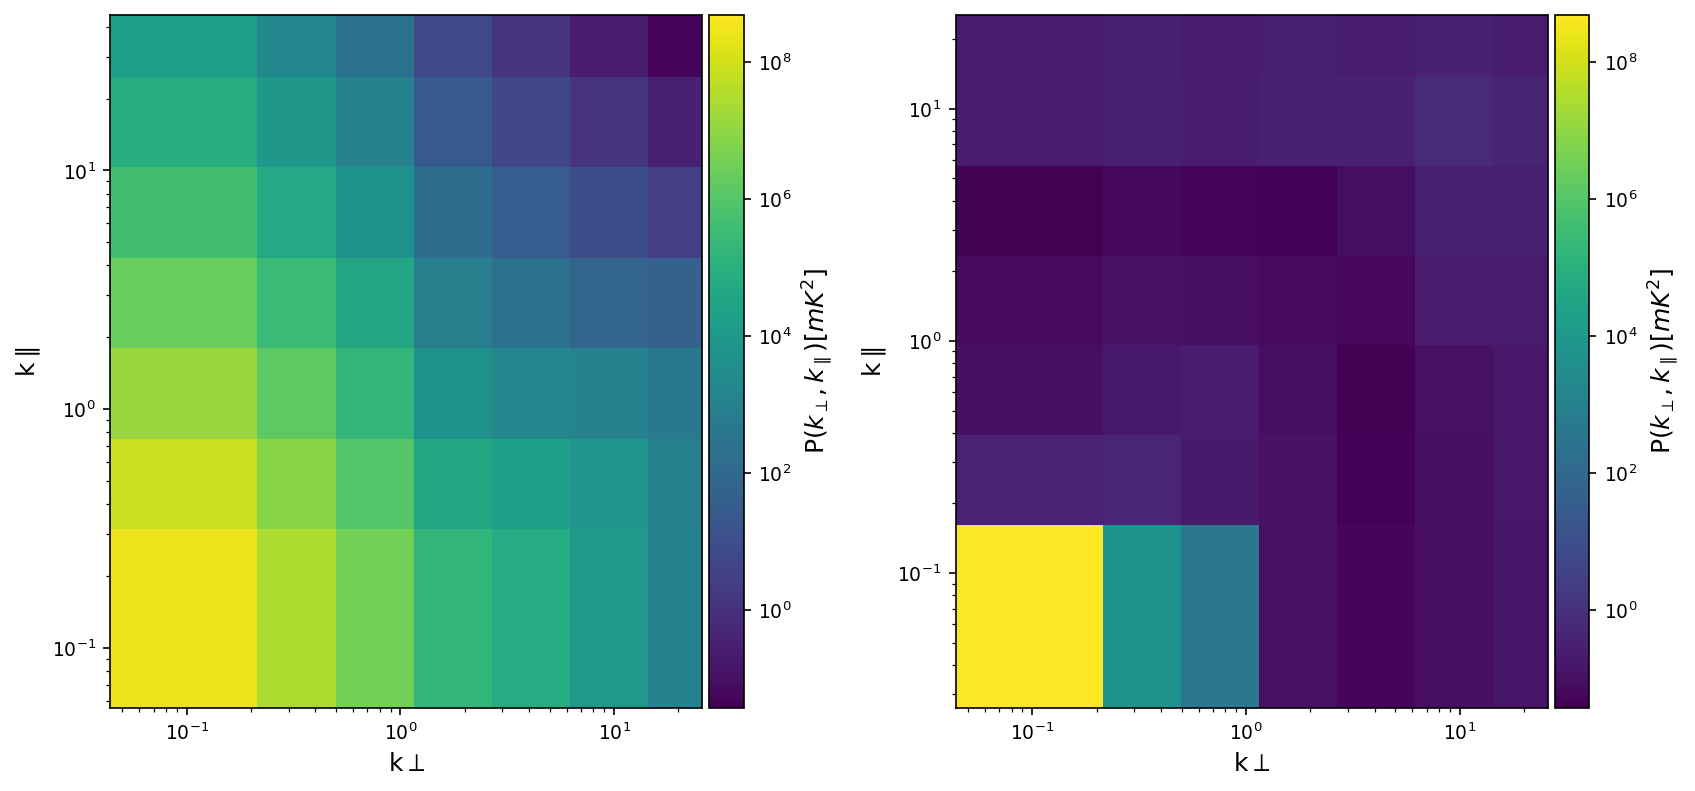

In [13]:
fig, ax = plt.subplots(figsize=(fig_width*2, fig_height),

                        nrows=nrows,
                        ncols=ncols)

plotting_scale={'x': 'log', 'y': 'log', 'z': 'log'}#
X_tdmsn, Y_tdmsn = kper_tdmsn, kpar_tdmsn
C_tdmsn = fp_tdmsn(X_tdmsn,Y_tdmsn)

X_6msn, Y_6msn = kper_6msn, kpar_6msn
C_6msn = fp_6msn(X_6msn,Y_6msn)
combined = np.array([C_6msn,C_tdmsn])

norm_tdmsn = colors.LogNorm(vmin=combined[np.isfinite(combined)].min(), vmax=combined[np.isfinite(combined)].max()) if plotting_scale['z']=='log' else None 
pcm_tdmsn = ax[0].pcolormesh(X_tdmsn, Y_tdmsn, C_tdmsn, norm=norm_tdmsn)


plt.colorbar(pcm_tdmsn, ax=ax[0], label=r'P$(k_\perp,k_\parallel)[mK^2]$', pad=0.01)
ax[0].set_xlabel(r'k$\perp$')
ax[0].set_ylabel(r'k$\parallel$')
ax[0].set_xscale(plotting_scale['x'])
ax[0].set_yscale(plotting_scale['y'])


norm_6msn = colors.LogNorm(vmin=combined[np.isfinite(combined)].min(), vmax=combined[np.isfinite(combined)].max()) if plotting_scale['z']=='log' else None 
pcm_6msn = ax[1].pcolormesh(X_6msn, Y_6msn, C_6msn, norm=norm_6msn)

plt.colorbar(pcm_6msn, ax=ax[1], label=r'P$(k_\perp,k_\parallel)[mK^2]$', pad=0.01)
ax[1].set_xlabel(r'k$\perp$')
ax[1].set_ylabel(r'k$\parallel$')
ax[1].set_xscale(plotting_scale['x'])
ax[1].set_yscale(plotting_scale['y'])
plt.savefig(base+'msn_cylindricalps.pdf', bbox_inches='tight', pad_inches=0.02, dpi=300)

fig, ax = plt.subplots(figsize=(fig_width*2, fig_height),

                        nrows=nrows,
                        ncols=ncols)

plotting_scale={'x': 'log', 'y': 'log', 'z': 'log'}#
X_tdmsw, Y_tdmsw = kper_tdmsw, kpar_tdmsw
C_tdmsw = fp_tdmsw(X_tdmsw,Y_tdmsw)

norm_tdmsw = colors.LogNorm(vmin=C_tdmsw[np.isfinite(C_tdmsw)].min(), vmax=C_tdmsw[np.isfinite(C_tdmsw)].max()) if plotting_scale['z']=='log' else None 
pcm_tdmsw = ax[0].pcolormesh(X_tdmsw, Y_tdmsw, C_tdmsw, norm=norm_tdmsw)

plt.colorbar(pcm_tdmsw, ax=ax[0], label='power', pad=0.01)
ax[0].set_xlabel(r'k$\perp$')
ax[0].set_ylabel(r'k$\parallel$')
ax[0].set_xscale(plotting_scale['x'])
ax[0].set_yscale(plotting_scale['y'])

X_msw6, Y_msw6 = kper_msw6, kpar_msw6
C_msw6 = fp_msw6(X_msw6,Y_msw6)

norm_msw6 = colors.LogNorm(vmin=C_msw6[np.isfinite(C_msw6)].min(), vmax=C_msw6[np.isfinite(C_msw6)].max()) if plotting_scale['z']=='log' else None 
pcm_msw6 = ax[1].pcolormesh(X_msw6, Y_msw6, C_msw6, norm=norm_msw6)

plt.colorbar(pcm_msw6, ax=ax[1], label='power', pad=0.01)
ax[1].set_xlabel(r'k$\perp$')
ax[1].set_ylabel(r'k$\parallel$')
ax[1].set_xscale(plotting_scale['x'])
ax[1].set_yscale(plotting_scale['y'])
plt.savefig(base+'msw_cylindricalps.pdf', bbox_inches='tight', pad_inches=0.02, dpi=300)

In [14]:
base = '/home/ppxjf3/'

fits_path = base + 'model_fICA_msn_5.fits'

with fits.open(fits_path, memmap=True) as hdu:

    arr = np.array(hdu[0].data[0:10, :, :])

    hdu.info()

    print(arr.shape)

    model_6_msn = arr

fits_path = base + 'resids_fICA_msn_5.fits'

with fits.open(fits_path, memmap=True) as hdu:

    arr = np.array(hdu[0].data[0:10, :, :])

    hdu.info()

    print(arr.shape)

    resids_6_msn = arr

Filename: /home/ppxjf3/model_fICA_msn_5.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (512, 512, 20)   float64   
(10, 512, 512)
Filename: /home/ppxjf3/resids_fICA_msn_5.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (512, 512, 20)   float64   
(10, 512, 512)


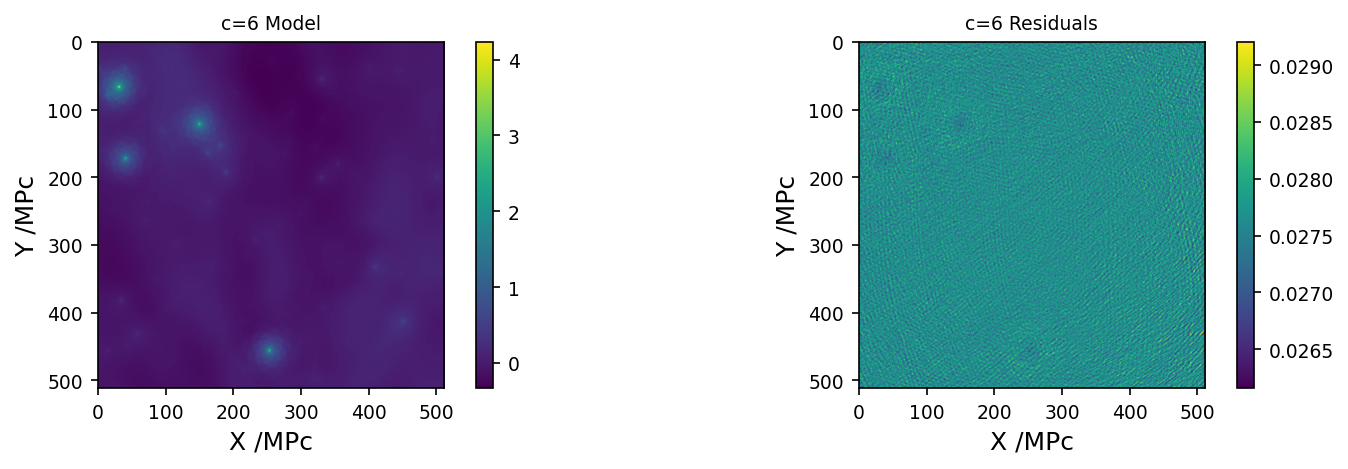

In [15]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1,2,1)
im = ax.imshow(model_6_msn[0,:,:])
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
ax.set_title('c=6 Model')
fig.colorbar(im, ax=ax)
clim = im.properties()['clim']
ax = fig.add_subplot(1,2,2)
im = ax.imshow(resids_6_msn[0,:,:])
ax.set_xlabel('X /MPc')
ax.set_ylabel('Y /MPc')
ax.set_title('c=6 Residuals')
fig.colorbar(im, ax=ax)
plt.show()